In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1

In [13]:
data = pd.read_json('logins.json')
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


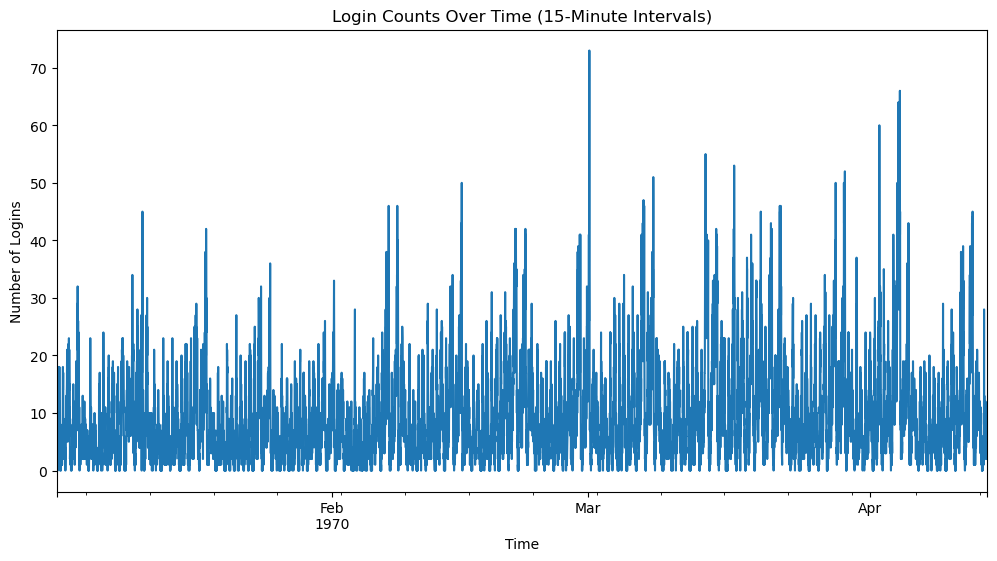

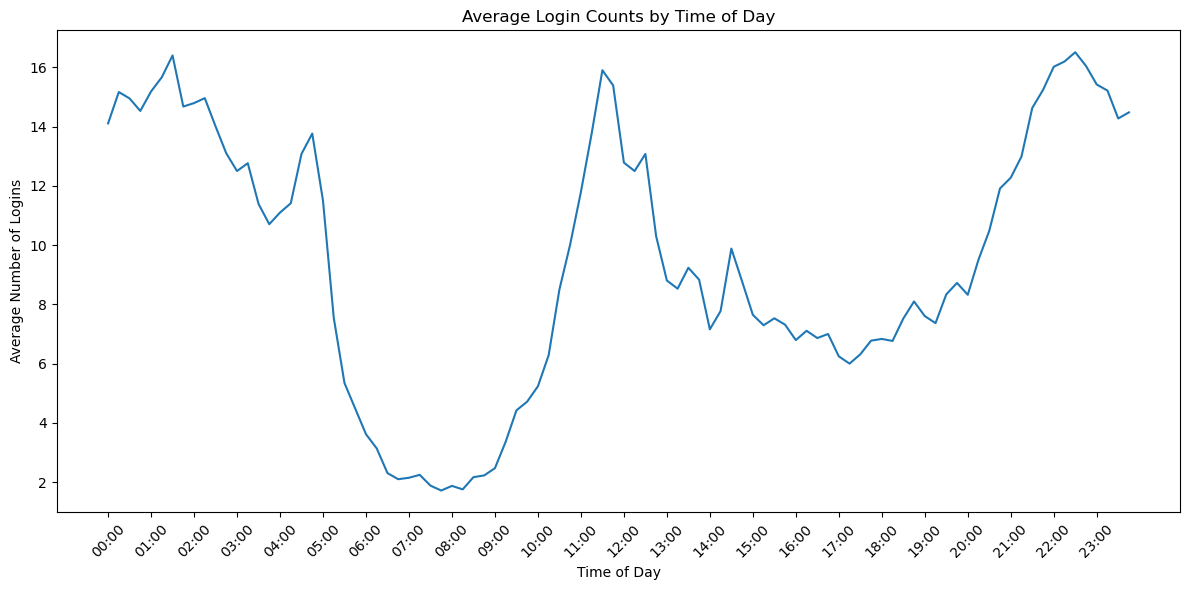

Summary Statistics of 15-Minute Intervals:
count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64
Number of missing intervals: 0


/tmp/ipykernel_4345/660246456.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  missing_intervals = pd.date_range(start=login_counts.index.min(), end=login_counts.index.max(), freq='15T').difference(login_counts.index)


In [14]:
data['login_time'] = pd.to_datetime(data['login_time'])  # Convert to datetime format

# Resample in 15-minute intervals
data.set_index('login_time', inplace=True)
login_counts = data.resample('15min').size()  # Updated resampling frequency

# Plot the time series
plt.figure(figsize=(12, 6))
login_counts.plot()
plt.title("Login Counts Over Time (15-Minute Intervals)")
plt.xlabel("Time")
plt.ylabel("Number of Logins")
plt.show()

# Visualize daily patterns (average by time of day)
daily_pattern = login_counts.groupby(login_counts.index.time).mean()
daily_pattern.index = daily_pattern.index.map(lambda t: t.strftime('%H:%M'))  # Convert time to string for plotting

# Average Login Counts by Time of Day
plt.figure(figsize=(12, 6))
plt.plot(daily_pattern.index, daily_pattern.values)
plt.title("Average Login Counts by Time of Day")
plt.xlabel("Time of Day")
plt.xticks(ticks=range(0, len(daily_pattern), 4), rotation=45)  # Adjust ticks to show every 4th label
plt.ylabel("Average Number of Logins")
plt.tight_layout()
plt.show()

# Identify demand features and data quality issues
print("Summary Statistics of 15-Minute Intervals:")
print(login_counts.describe())

# Check for any missing intervals
missing_intervals = pd.date_range(start=login_counts.index.min(), end=login_counts.index.max(), freq='15T').difference(login_counts.index)
print("Number of missing intervals:", len(missing_intervals))


Login Counts Over Time (15-Minute Intervals): The first plot shows login counts aggregated over 15-minute intervals, revealing fluctuations in user demand over time. There are visible spikes indicating periods of higher demand, and it appears there may be a repeating pattern, possibly suggesting cycles or peaks during specific times of day or week.

Average Login Counts by Time of Day: The second plot demonstrates an average daily login pattern. It reveals a clear daily cycle with peaks in the early morning and evening hours, while login counts drop during early morning hours (likely reflecting typical sleep times).

# Part 2

# Experiment and Metrics Design

## Context

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms:
- On weekdays:
  - **Gotham** is most active at **night**
  - **Metropolis** is most active during the **day**
- On weekends: there is reasonable activity in both cities.

However, a toll bridge with a two-way toll between the two cities discourages driver partners from serving both cities. Ultimate managers of city operations have proposed an experiment to reimburse all toll costs to encourage cross-city service.

## 1) Key Measure of Success

The **key measure of success** for this experiment would be the **percentage increase in drivers who serve both cities** after the toll reimbursement policy is implemented.

### Rationale

This metric directly assesses the experiment's goal, which is to encourage drivers to operate in both cities rather than being exclusive to one. A noticeable increase in cross-city driving would indicate that toll reimbursement effectively reduces the barrier (toll cost) that previously discouraged drivers from traveling between the cities.

**Supporting Metrics**:
- **Total number of trips across the bridge** (between the two cities).
- **Driver retention rate** for those who serve both cities after the experiment.
- **Percentage of total active hours spent in each city** by drivers who now serve both cities.

## 2) Experiment Design

To evaluate the effectiveness of the toll reimbursement policy, an **A/B testing experiment** with two groups of drivers in each city is proposed:

- **Group A (Control)**: Drivers who continue under the current conditions without toll reimbursement.
- **Group B (Treatment)**: Drivers who are reimbursed for toll costs when they cross between the cities.

### a) Implementation

1. **Random Assignment**: Randomly assign drivers in each city to either Group A (Control) or Group B (Treatment). This ensures there is no selection bias.
   
2. **Data Collection**:
   - Track the number of trips each driver takes in their primary city and the neighboring city.
   - Record toll usage (how frequently drivers in the Treatment group cross the toll bridge).
   - Monitor driver hours worked in each city to analyze time distribution.
   
3. **Duration**: Run the experiment for a sufficiently long period (e.g., 1-3 months) to account for variations in driver behavior due to weekdays and weekends. This will also help control for seasonal changes or special events that may temporarily affect travel patterns.

4. **Baseline Data**: Collect baseline data for at least one month before the experiment to establish a benchmark for cross-city activity levels and toll bridge usage. This will help in measuring any significant change during the experiment period.

### b) Statistical Tests

1. **Hypothesis Testing**:
   - **Null Hypothesis (H0)**: There is no significant difference in cross-city driving behavior between the Control and Treatment groups.
   - **Alternative Hypothesis (H1)**: The Treatment group has a significantly higher level of cross-city driving behavior than the Control group.

2. **Statistical Tests**:
   - **Two-sample t-test** (or **Mann-Whitney U test** if the data is not normally distributed) to compare the mean number of cross-city trips or mean hours worked in the neighboring city between the Control and Treatment groups.
   - **Chi-square test** to assess the difference in the proportion of drivers in each group who serve both cities.
   - **ANOVA** or **repeated measures test** (if tracking multiple time points) to see if there’s a statistically significant difference in cross-city trips over time within each group.

3. **Significance Level**: Use a standard significance level (e.g., α = 0.05) to determine if the observed differences are statistically significant.

### c) Interpretation of Results and Recommendations

1. **Interpreting Results**:
   - If the tests show a statistically significant increase in cross-city driving behavior in the Treatment group, it would suggest that the toll reimbursement effectively encourages drivers to operate in both cities.
   - If there is no significant difference, it may imply that other barriers (e.g., different traffic patterns, demand, or city familiarity) still discourage drivers from serving both cities, and simply removing the toll cost is not enough to change driver behavior.

2. **Recommendations**:
   - **If Successful**: Recommend a full rollout of toll reimbursement to support cross-city service. Additionally, consider complementary incentives, such as bonuses for cross-city trips during peak hours in the under-served city.
   - **If Not Successful**: Suggest conducting further research to understand other deterrents to cross-city service and experimenting with additional incentives or logistical support for cross-city drivers.


# Part 3 - Predictive Modeling for Rider Retention

## Introduction

Ultimate aims to predict rider retention, defining a retained user as one who has taken a trip in the last 30 days. The provided dataset contains a cohort of users who signed up in January 2014, with information about their usage patterns, ratings, and other characteristics. This analysis will clean the data, perform exploratory analysis, build a predictive model, and offer insights for improving long-term rider retention.

---

## 1. Data Cleaning, Exploratory Analysis, and Visualizations

Fraction of retained users: 37.61%
Missing values:
 city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64


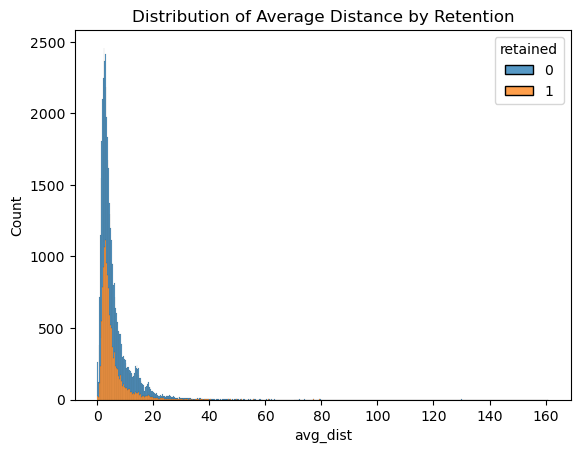

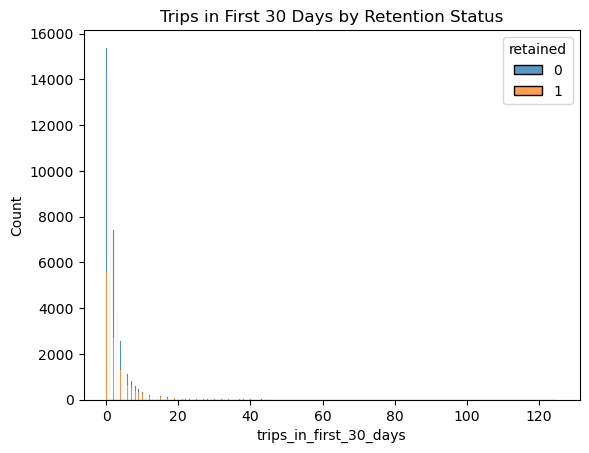

In [18]:
# Load the data
data = pd.read_json('ultimate_data_challenge.json')

# Convert dates to datetime objects
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# Define retention: Calculate the last observed date and create a 'retained' column
last_date = data['last_trip_date'].max()
data['retained'] = (data['last_trip_date'] >= last_date - pd.Timedelta(days=30)).astype(int)

# Fraction of users retained
retention_rate = data['retained'].mean()
print(f"Fraction of retained users: {retention_rate:.2%}")

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values without inplace to avoid warnings
data['avg_rating_by_driver'] = data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean())
data['avg_rating_of_driver'] = data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean())


# Visualize distributions of key features by retention status
sns.histplot(data=data, x='avg_dist', hue='retained', multiple='stack')
plt.title("Distribution of Average Distance by Retention")
plt.show()

sns.histplot(data=data, x='trips_in_first_30_days', hue='retained', multiple='stack')
plt.title("Trips in First 30 Days by Retention Status")
plt.show()

Distribution of Average Distance by Retention: Most trips have shorter average distances, with a higher concentration of trips below 20 miles. The distribution shows that retained and non-retained users have similar average trip distances, but non-retained users slightly dominate in count. This suggests that trip distance may not be a strong predictor of retention on its own.

Trips in First 30 Days by Retention Status: This plot shows that users with fewer trips in their first 30 days tend to have lower retention rates. Higher initial engagement (i.e., more trips in the first 30 days) seems correlated with better retention, indicating that trip frequency within the first month may be an important factor in predicting long-term retention.

These findings suggest that trips in the first 30 days could be a key feature for the predictive model. Let’s proceed with building a model using these insights to predict retention, focusing on features like initial trip activity, ratings, and other engagement metrics. Let me know if you’d like to continue with model building!

## 2. **Build a predictive model**: to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

In [20]:
from datetime import timedelta

# Define retention as activity in the 6th month after signup
data['6_month_date'] = data['signup_date'] + pd.DateOffset(months=6)

# Define retention as being active within the 6th month
data['retained_6th_month'] = ((data['last_trip_date'] >= data['6_month_date'] - timedelta(days=30)) &
                              (data['last_trip_date'] <= data['6_month_date'])).astype(int)

# Check the new retention rate for the 6th month
retention_rate_6th_month = data['retained_6th_month'].mean()
print(f"Fraction of users retained in the 6th month: {retention_rate_6th_month:.2%}")

Fraction of users retained in the 6th month: 24.40%


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Select relevant features for prediction
features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct', 
            'avg_surge', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct', 'city', 'phone']
X = data[features]
y = data['retained_6th_month']

# Encode categorical variables
X = pd.get_dummies(X, columns=['city', 'phone'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_proba))


### Model Metrics Summary

- **Precision**:
  - Non-Retained (Class 0): 0.82
  - Retained (Class 1): 0.64
  - Indicates that 64% of predicted retained users are actually retained.

- **Recall**:
  - Non-Retained (Class 0): 0.93
  - Retained (Class 1): 0.39
  - Shows the model has a high ability to identify non-retained users but struggles with identifying all retained users, capturing only 39%.

- **F1-Score**:
  - Non-Retained (Class 0): 0.87
  - Retained (Class 1): 0.48
  - Highlights a performance imbalance, with stronger prediction for non-retained users.

- **AUC Score**: 0.82
  - Demonstrates decent discrimination between retained and non-retained users, though improvement is possible for the minority class.

### Observations

- The model performs well for non-retained users but has lower recall for retained users, likely due to class imbalance.
- Adding class weights or experimenting with alternative models (e.g., Gradient Boosting) may improve recall for retained users.


## 3. Briefly discuss how Ultimate might leverage the insights gained from the model 
to improve its long term rider retention (again, a few sentences will suffice).